In [333]:
# Importing

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.metrics import classification_report

# Algorithm

In [334]:
def knn_frank(X, X_train, y_train, algorithm, k=5):
    """
    Do a KNN prediction. 
    algorithm specifies can be 'clf' for classification or 'reg' for regression. 
    X are the instances to be predicted,
    X_train and y_train are the features and targets used for training,
    k is the number of neighbors.
    Return a predict array.
    """
    
    M = X_train.shape[0]                # Get the number of instances in the training set
    N = X.shape[0]                      # Get the number of instances to be predicted
    
    y_pred = np.zeros(N)                # Our predictions will be stored here
    
    for j in range(N):                  # Loop to predict all X_new[j] instances given
        distances = np.zeros(M)         # Distances are to be stored here

        for i in range(M):              # Loop to get the distances from instance X_new[j] to all the training X
            distances[i] = np.linalg.norm((X[j] - X_train[i])) # Euclidean distance

        sorted_indexes = np.argsort(distances)           # Get the indexes from sorted distances (low to high)

        k_indexes = sorted_indexes[:k]                   # Get the k-th first (k-closest instances)
        k_labels = y_train[k_indexes]                    # Get the labels from k-closests  

        
        if algorithm == 'clf':                                      # Check if it is a classification
            label, count = np.unique(k_labels, return_counts=True)  # Count the labels from k-closest
            y_pred[j] = label[count.argmax()]                       # Assign the most frequent label
        
        elif algorithm == 'reg':                                    # It is a regression
            y_pred[j] = k_labels.mean()                             # Assign the mean
        
        else:
            print('Select either algorithm to be clf or reg.')
    
    return y_pred

# KNN Classification

In [335]:
# Loading the Iris dataset

iris = load_iris()
X = iris.data[:, 2:] # Selecting the two last columns
y = iris.target

target_names = iris.target_names
features_names = iris.feature_names

In [336]:
# Suppose we are out in the wild and find three new specimens

X_new = np.array([[3.0, 0.90],
                  [7.0, 1.75],
                  [1.2, 1.00]
                 ])

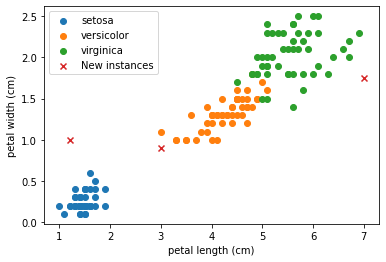

In [337]:
# Plotting

plt.scatter(X[y == 0][:,0], X[y == 0][:,1], label=target_names[0])
plt.scatter(X[y == 1][:,0], X[y == 1][:,1], label=target_names[1])
plt.scatter(X[y == 2][:,0], X[y == 2][:,1], label=target_names[2])
plt.scatter(X_new[:, 0], X_new[:, 1], marker='x', label='New instances')
plt.xlabel(features_names[2])
plt.ylabel(features_names[3])
plt.legend()
plt.show()

In [338]:
# We expect our predicts to be: [1, 2, 0]

In [341]:
# As expected ...

knn_frank(X_new, X, y, algorithm='clf', k=5)

array([1., 2., 0.])

In [342]:
# Compare with Sklearn's classifier version

from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X, y)
knn_clf.predict(X_new)

array([1, 2, 0])

In [344]:
# Lets compare the metrics from the training

y_pred_frank = knn_frank(X, X, y, algorithm='clf', k=5)

knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X, y)
y_pred_sklearn = knn_clf.predict(X)

print('KNN-Frank metrics')
print(classification_report(y, y_pred_frank))
print('----------------------------------------------------------------')
print('KNN-Sklearn metrics')
print(classification_report(y, y_pred_sklearn))

KNN-Frank metrics
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.94      0.94        50
           2       0.94      0.94      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150

----------------------------------------------------------------
KNN-Sklearn metrics
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.94      0.94        50
           2       0.94      0.94      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



In [ ]:
# Same result.

In [345]:
# Making a Voronoi plot

# Build feature space

x_space = np.linspace(0.8, 7.1, 150)
y_space = np.linspace(0.0, 2.7, 150)

xx, yy = np.meshgrid(x_space, y_space)

X_space = np.c_[xx.ravel(), yy.ravel()]

# Predict all points in the grid

y_pred_frank = knn_frank(X_space, X, y, algorithm='clf', k=5)

knn_clf = KNeighborsClassifier(n_neighbors=5,  
                               metric='euclidean',
                               algorithm='brute'
                              )
knn_clf.fit(X, y)
y_pred_sklearn = knn_clf.predict(X_space)

In [346]:
# Performance is significantly slower when compared to the sklearn one

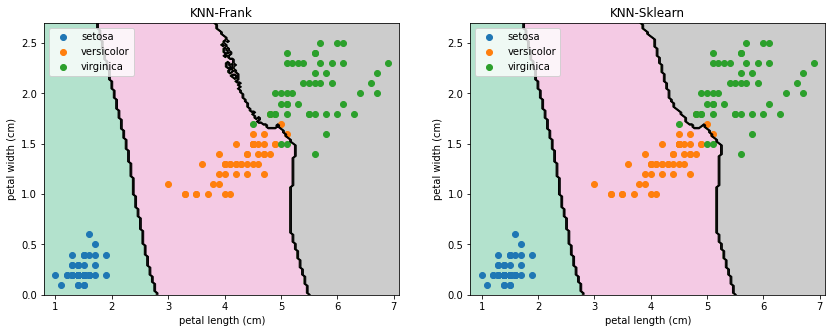

In [347]:
# Plotting

plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.contourf(xx, yy, y_pred_frank.reshape(xx.shape), extent=(0.8, 7.1, 0.0, 2.7), cmap='Pastel2')
plt.contour(xx, yy, y_pred_frank.reshape(xx.shape), extent=(0.8, 7.1, 0.0, 2.7), linewidths=1, colors='k')
plt.scatter(X[y == 0][:,0], X[y == 0][:,1], label=target_names[0])
plt.scatter(X[y == 1][:,0], X[y == 1][:,1], label=target_names[1])
plt.scatter(X[y == 2][:,0], X[y == 2][:,1], label=target_names[2])
plt.xlabel(features_names[2])
plt.ylabel(features_names[3])
plt.xlim(0.8, 7.1)
plt.ylim(0.0, 2.7)
plt.title('KNN-Frank')
plt.legend()

plt.subplot(1,2,2)
plt.contourf(xx, yy, y_pred_sklearn.reshape(xx.shape), extent=(0.8, 7.1, 0.0, 2.7), cmap='Pastel2')
plt.contour(xx, yy, y_pred_sklearn.reshape(xx.shape), extent=(0.8, 7.1, 0.0, 2.7), linewidths=1, colors='k')
plt.scatter(X[y == 0][:,0], X[y == 0][:,1], label=target_names[0])
plt.scatter(X[y == 1][:,0], X[y == 1][:,1], label=target_names[1])
plt.scatter(X[y == 2][:,0], X[y == 2][:,1], label=target_names[2])
plt.xlabel(features_names[2])
plt.ylabel(features_names[3])
plt.xlim(0.8, 7.1)
plt.ylim(0.0, 2.7)
plt.title('KNN-Sklearn')
plt.legend()

plt.show()

In [348]:
# Pretty similar, but with some noise on the boundaries

# KNN Regression

In [349]:
# Loading data
data = pd.read_csv('data/iq-brain.csv')

# Some cleaning

data[['AREA', 'CCSA', 'CIRC', 'WT']] = data.loc[:,['AREA', 'CCSA', 'CIRC', 'WT']].apply(
    lambda x: x.str.replace(',', '.'))

cat_cols = ['PAIR', 'SEX (1=M)', 'ORDER']
num_cols = ['IQ', 'VOL', 'AREA', 'CCSA', 'CIRC', 'WT']

data[cat_cols] = data[cat_cols].astype('object')
data[num_cols] = data[num_cols].astype('float32')

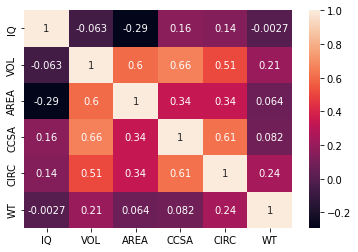

IQ      1.000000
CCSA    0.156252
CIRC    0.137839
WT     -0.002702
VOL    -0.063392
AREA   -0.291319
Name: IQ, dtype: float64

In [352]:
# Checking correlation to get two good columns to do a regression

sns.heatmap(data.corr(), annot=True)
plt.show()

data.corr()['IQ'].sort_values(ascending=False)

In [353]:
# Lets use CCSA (Cortex Cross section area) and AREA.

X = data[['AREA', 'CCSA']].to_numpy()
y = data['IQ'].to_numpy()

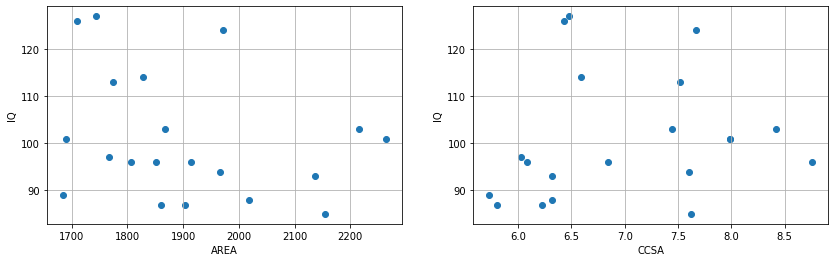

In [355]:
# Plotting those features against our target (IQ)

plt.figure(figsize=(14,4))

plt.subplot(1,2,1)
plt.scatter(X[:,0], y)
plt.xlabel('AREA')
plt.ylabel('IQ')
plt.grid()

plt.subplot(1,2,2)
plt.scatter(X[:,1], y)
plt.xlabel('CCSA')
plt.ylabel('IQ')
plt.grid()

plt.show()

In [361]:
# Again, suppose we got those two new instances

X_new = np.array([[2100.0, 8.40],
                  [1800.0, 6.75]
                  ])

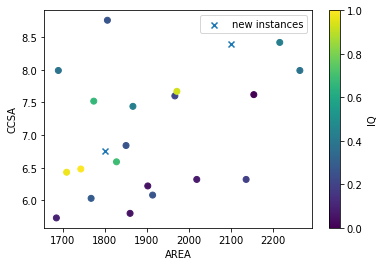

In [362]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.scatter(X_new[:,0], X_new[:,1], marker='x', label='new instances')
plt.xlabel('AREA')
plt.ylabel('CCSA')
plt.colorbar(label='IQ')
plt.legend()
plt.show()

In [363]:
knn_frank(X_new, X, y, algorithm='reg', k=5)

array([ 98.59999847, 103.19999695])

In [365]:
# Compare with Sklearn regressor

from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X, y)
knn_reg.predict(X_new)

array([ 98.6, 103.2], dtype=float32)

In [370]:
# Lets compare metrics

from sklearn.metrics import mean_squared_error

knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X, y)
y_pred_sklearn = knn_reg.predict(X)

y_pred_frank = knn_frank(X, X, y, algorithm='reg', k=5)

print(f'KNN-Frank RMSE: {np.sqrt(mean_squared_error(y, y_pred_frank))}')
print(f'KNN-Sklearn RMSE: {np.sqrt(mean_squared_error(y, y_pred_sklearn))}')

KNN-Frank RMSE: 11.511298777385678
KNN-Sklearn RMSE: 11.511298179626465


In [ ]:
# On spot

In [380]:
# Lets try to make a regression between AREA and IQ

X_space = np.linspace(1680, 2265, 100)
y_space_pred = knn_frank(X_space, X[:,0], y, algorithm='reg', k=3)

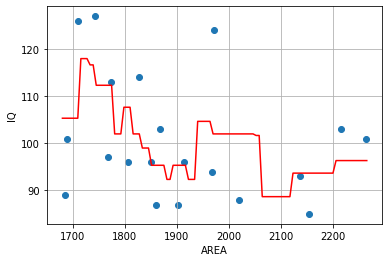

In [381]:
plt.scatter(X[:,0], y)
plt.plot(X_space, y_space_pred, 'r')
plt.xlabel('AREA')
plt.ylabel('IQ')
plt.grid()
plt.show()

In [176]:
# Useful tips for KNN

# k must be odd if it is a two class problem
# k must not be a multiple of the number of classes
# complexity scales with the number of instances
# sometimes data should be normalized/scaled